### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than 12500 , 12500 - 24999, 25000 - 37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [568]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.patches import Patch
from IPython.display import Markdown as md


## Problems

Use the prompts below to get started with your data analysis.  

### 1. Read in the <font color="gray">*coupons.csv*</font> file.




In [569]:
data = pd.read_csv('data/coupons.csv')

### 2. Investigate the dataset for missing or problematic data.

**2.1 Looking at some random data**

In [570]:
data.sample(20)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1930,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Female,31,Single,...,1~3,4~8,gt8,less1,1,1,0,0,1,1
6543,No Urgent Place,Alone,Sunny,80,2PM,Restaurant(<20),2h,Female,50plus,Divorced,...,1~3,less1,4~8,less1,1,1,0,0,1,0
608,Work,Alone,Sunny,80,7AM,Carry out & Take away,2h,Male,26,Single,...,never,4~8,1~3,less1,1,0,0,1,0,1
9189,No Urgent Place,Alone,Rainy,55,10AM,Coffee House,1d,Male,21,Single,...,never,less1,less1,less1,1,1,0,0,1,0
1786,Work,Alone,Sunny,55,7AM,Coffee House,2h,Male,21,Unmarried partner,...,1~3,4~8,4~8,1~3,1,1,0,0,1,1
8868,No Urgent Place,Alone,Sunny,80,10AM,Coffee House,2h,Male,26,Single,...,1~3,4~8,1~3,less1,1,1,0,0,1,1
10566,Work,Alone,Sunny,80,7AM,Restaurant(<20),1d,Male,26,Single,...,1~3,1~3,4~8,4~8,1,0,0,0,1,1
4816,Home,Alone,Sunny,80,6PM,Coffee House,1d,Female,31,Single,...,1~3,1~3,1~3,less1,1,0,0,0,1,1
1327,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Female,46,Single,...,less1,1~3,1~3,1~3,1,0,0,0,1,0
9322,No Urgent Place,Alone,Snowy,30,2PM,Bar,1d,Female,46,Divorced,...,1~3,1~3,1~3,1~3,1,0,0,0,1,0


**2.2 Looking for <font color="gray">*null*</font> data**

In [571]:
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

**2.3 Looking at column names and data types**

In [572]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

**2.4 Looking into each column's value counts**

In [573]:
for col in data.columns:
    print(data[col].value_counts())
    print('\n')

No Urgent Place    6283
Home               3237
Work               3164
Name: destination, dtype: int64


Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: passanger, dtype: int64


Sunny    10069
Snowy     1405
Rainy     1210
Name: weather, dtype: int64


80    6528
55    3840
30    2316
Name: temperature, dtype: int64


6PM     3230
7AM     3164
10AM    2275
2PM     2009
10PM    2006
Name: time, dtype: int64


Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: coupon, dtype: int64


1d    7091
2h    5593
Name: expiration, dtype: int64


Female    6511
Male      6173
Name: gender, dtype: int64


21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: age, dtype: int64


Married partner      5100
Single               4752
Unmarried partner    2186
Divorced              516
Widow

**2.5 Analyzing some columns**

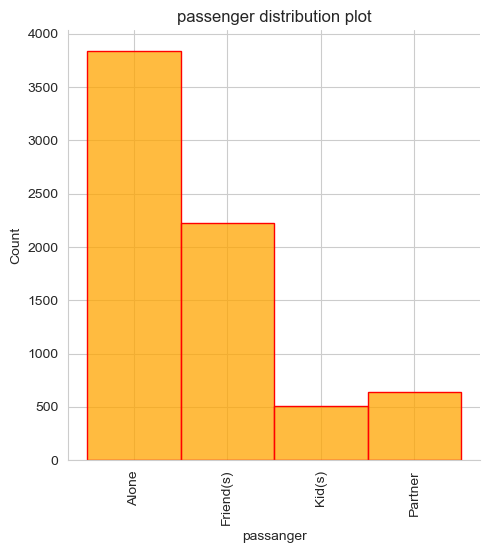

In [574]:
# create the displot
sns.displot(data.query('Y == 1')['passanger'], color='orange', edgecolor='red')

# rotate the x-axis labels
plt.xticks(rotation=90)

# title
plt.title('passenger distribution plot')

# show the plot
plt.show()

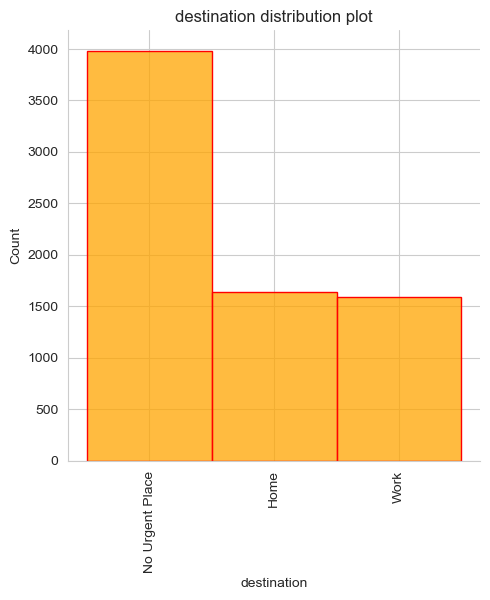

In [575]:
# create the displot
sns.displot(data.query('Y == 1')['destination'], color='orange', edgecolor='red')

# rotate the x-axis labels
plt.xticks(rotation=90)

# title
plt.title('destination distribution plot')

# show the plot
plt.show()

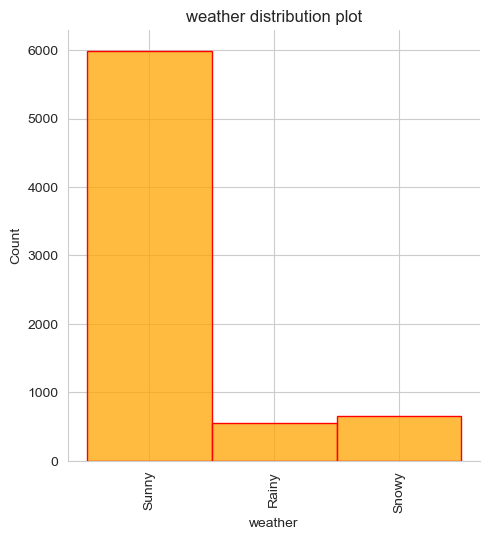

In [576]:
# create the displot
sns.displot(data.query('Y == 1')['weather'], color='orange', edgecolor='red')

# rotate the x-axis labels
plt.xticks(rotation=90)

# title
plt.title('weather distribution plot')

# show the plot
plt.show()

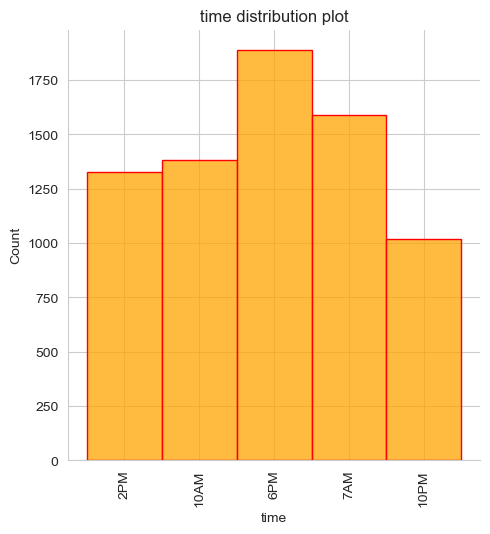

In [577]:
# create the displot
sns.displot(data.query('Y == 1')['time'], color='orange', edgecolor='red')

# rotate the x-axis labels
plt.xticks(rotation=90)

# title
plt.title('time distribution plot')

# show the plot
plt.show()

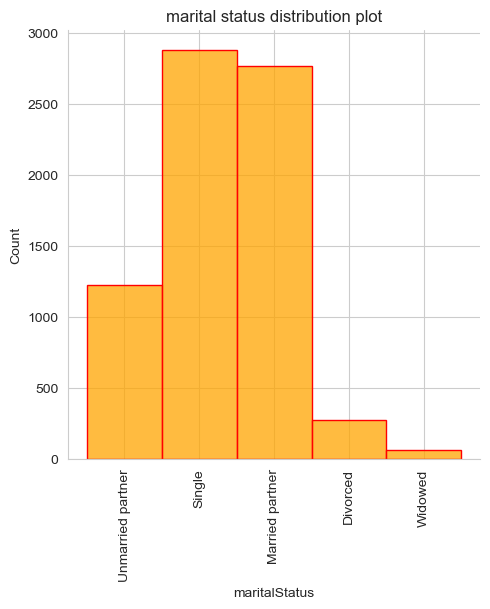

In [578]:
# create the displot
sns.displot(data.query('Y == 1')['maritalStatus'], color='orange', edgecolor='red')

# rotate the x-axis labels
plt.xticks(rotation=90)

# title
plt.title('marital status distribution plot')

# show the plot
plt.show()

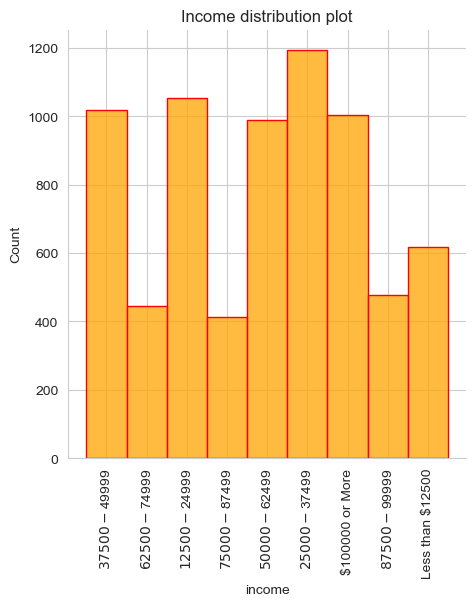

In [579]:
# create the displot
sns.displot(data.query('Y == 1')['income'], color='orange', edgecolor='red')

# rotate the x-axis labels
plt.xticks(rotation=90)

# title
plt.title('Income distribution plot')

# show the plot
plt.show()

### 3. Decide what to do about your missing data -- drop, replace, other...

*Several columns can be transformed into numeric values. I'll go in detail below*

**3.1 Creating a new dataset:**

In [580]:
coupon_df = data.copy()

**3.2 Column Transformation**

**column: <font color="gray">*passenger* </font>**

In [581]:
# fix the typo
coupon_df = coupon_df.rename(columns={'passanger': 'passenger'})

# mapping into numeric values
passenger_mapping = {'passenger': {'Alone': 1, 'Partner': 2, 'Kid(s)': 3, 'Friend(s)' : 4 } }
coupon_df = coupon_df.replace(passenger_mapping)

**column: <font color="gray">*weather* </font>**

In [582]:
# mapping into numeric values
weather_mapping = {'weather': {'Snowy': 1, 'Rainy': 2, 'Sunny': 3 } }
coupon_df = coupon_df.replace(weather_mapping)

**column: <font color="gray">*time* </font>**

In [583]:
# mapping into numeric values
time_mapping = {'time': {'7AM': 7, '10AM': 10, '2PM': 14, '6PM': 18, '10PM': 22 } }
coupon_df = coupon_df.replace(time_mapping)

**column: <font color="gray">*expiration* </font>**

In [584]:
# mapping into numeric values
expiration_mapping = {'expiration': {'2h': 2, '1d': 24 } }
coupon_df = coupon_df.replace()

**column: <font color="gray">*gender* </font>**

In [585]:
# mapping into numeric values
gender_mapping = {'gender': {'Female': 1, 'Male': 2 } }
coupon_df = coupon_df.replace(gender_mapping)

**column: <font color="gray">*age* </font>**

In [586]:
coupon_df = coupon_df.replace({'age': {'50plus': 50, 'below21': 20 } })
coupon_df['age'] = pd.to_numeric(coupon_df['age'])

**column: <font color="gray">*maritalStatus* </font>**

In [587]:
# mapping into numeric values
maritalStatus_mapping = {'maritalStatus': {'Single': 1, 'Married partner': 2, 'Unmarried partner': 2, 'Divorced': 1, 'Widowed': 1} }
coupon_df = coupon_df.replace(maritalStatus_mapping)

**column: <font color="gray">*education* </font>**

In [588]:
# mapping into numeric values
education_mapping = {'education': {'Some college - no degree': 4, 'Bachelors degree': 5, 'Graduate degree (Masters or Doctorate)': 6, 'Associates degree' : 3, 'High School Graduate': 2, 'Some High School':1 } }
coupon_df = coupon_df.replace(education_mapping)

**column: <font color="gray">*income* </font>**

In [589]:
# mapping into numeric values
income_mapping = {'income': {'Less than $12500': 12500, '$12500 - $24999': 24999, '$25000 - $37499': 37499, '$37500 - $49999': 49999, '$50000 - $62499': 62499, '$62500 - $74999': 74999 , '$75000 - $87499': 87499, '$87500 - $99999': 99999, '$100000 or More': 100000} }
coupon_df = coupon_df.replace(income_mapping)

*I noticed several columns share the following frequency code:*

In [590]:
rates = {'never': 0, 'less1': 1, '1~3': 2, '4~8': 6, 'gt8': 9}

**columns: <font color="gray">*Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50* </font>**

In [591]:
coupon_df = coupon_df.replace({'Bar': rates })
coupon_df = coupon_df.replace({'CoffeeHouse': rates })
coupon_df = coupon_df.replace({'CarryAway': rates })
coupon_df = coupon_df.replace({'RestaurantLessThan20': rates })
coupon_df = coupon_df.replace({'Restaurant20To50': rates })

**3.3 Now we verify the columns and datatypes of the new dataset**

In [592]:
coupon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   destination           12684 non-null  object 
 1   passenger             12684 non-null  int64  
 2   weather               12684 non-null  int64  
 3   temperature           12684 non-null  int64  
 4   time                  12684 non-null  int64  
 5   coupon                12684 non-null  object 
 6   expiration            12684 non-null  object 
 7   gender                12684 non-null  int64  
 8   age                   12684 non-null  int64  
 9   maritalStatus         12684 non-null  int64  
 10  has_children          12684 non-null  int64  
 11  education             12684 non-null  int64  
 12  occupation            12684 non-null  object 
 13  income                12684 non-null  int64  
 14  car                   11447 non-null  object 
 15  Bar                

**3.4 We verify value counts as well**

In [593]:
for col in coupon_df.columns:
    print(coupon_df[col].value_counts())
    print('\n')

No Urgent Place    6283
Home               3237
Work               3164
Name: destination, dtype: int64


1    7305
4    3298
2    1075
3    1006
Name: passenger, dtype: int64


3    10069
1     1405
2     1210
Name: weather, dtype: int64


80    6528
55    3840
30    2316
Name: temperature, dtype: int64


18    3230
7     3164
10    2275
14    2009
22    2006
Name: time, dtype: int64


Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: coupon, dtype: int64


1d    7091
2h    5593
Name: expiration, dtype: int64


1    6511
2    6173
Name: gender, dtype: int64


21    2653
26    2559
31    2039
50    1788
36    1319
41    1093
46     686
20     547
Name: age, dtype: int64


2    7286
1    5398
Name: maritalStatus, dtype: int64


0    7431
1    5253
Name: has_children, dtype: int64


4    4351
5    4335
6    1852
3    1153
2     905
1      88
Name: education, dtype: int64


Unemployed

### 4. What proportion of the total observations chose to accept the coupon?



In [594]:
Q4 =  coupon_df.query('Y == 1')['Y'].count()/len(coupon_df['Y'])*100

md(f'<font color="red" size=5>Answer:</font> \n\n'
         f'Coupon acceptance rate is **`{Q4:.2f}`%**')


<font color="red" size=5>Answer:</font> 

Coupon acceptance rate is **`56.84`%**

### 5. Use a bar plot to visualize the <font color="gray">*coupon*</font> column.

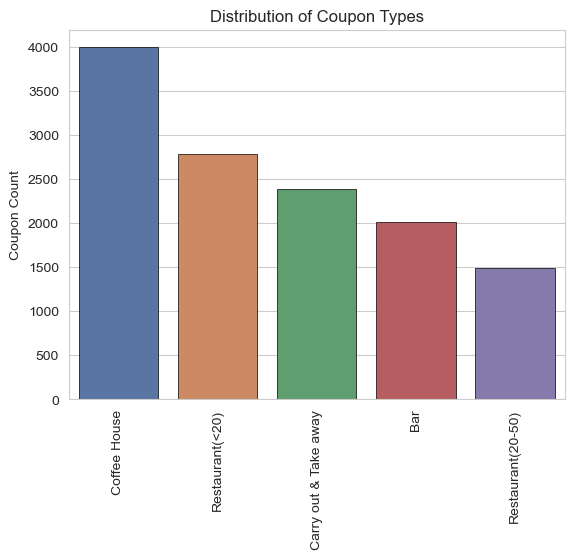

In [595]:
# create countplot of the coupon column
sns.set_palette("deep")
sns.countplot(data=coupon_df,
              x='coupon',
              order=coupon_df['coupon'].value_counts().index,
              linewidth=0.5,
              edgecolor='black')

# customize the plot
plt.title('Distribution of Coupon Types')
plt.xlabel('')
plt.ylabel('Coupon Count')
plt.xticks(rotation = 90)
# plt.tight_layout()

# display the plot
plt.show()

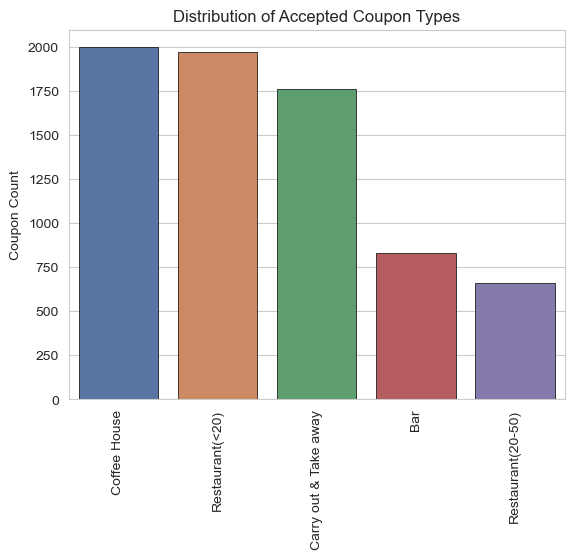

In [596]:
# create countplot of the coupon column
sns.set_palette("deep")
sns.countplot(data=coupon_df.query('Y == 1'),
              x='coupon',
              order=coupon_df['coupon'].value_counts().index,
              linewidth=0.5,
              edgecolor='black')

# customize the plot
plt.title('Distribution of Accepted Coupon Types')
plt.xlabel('')
plt.ylabel('Coupon Count')
plt.xticks(rotation = 90)
# plt.tight_layout()

# save plot image
plt.savefig('images/plot1_1.png', dpi=300, bbox_inches='tight')

# display the plot
plt.show()

### 6. Use a histogram to visualize the temperature column.

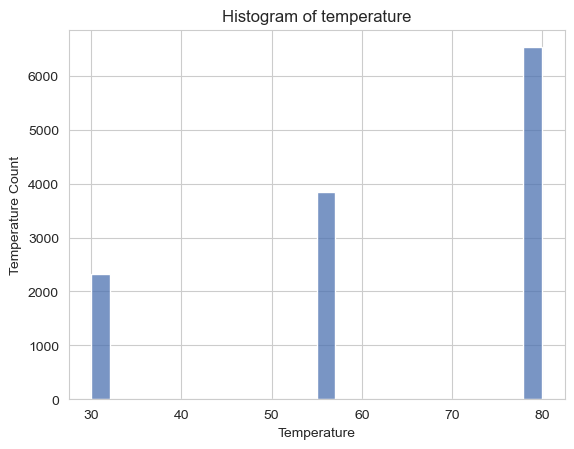

In [597]:
sns.histplot(coupon_df['temperature'])

plt.title('Histogram of temperature')
plt.xlabel('Temperature')
plt.ylabel('Temperature Count')

plt.show()

## Investigating the Bar Coupons

Now, we will lead you through an exploration of just the bar related coupons.  

### 1. Create a new <font color="gray">*DataFrame*</font> that contains just the bar coupons.


In [598]:
bar_coupons = coupon_df.copy()
bar_coupons = bar_coupons.query('coupon == "Bar"')
bar_coupons

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,3,3,80,10,Bar,1d,1,21,2,...,0,NaN,6,2,1,1,0,0,1,0
13,Home,1,3,55,18,Bar,1d,1,21,2,...,0,NaN,6,2,1,0,0,1,0,1
17,Work,1,3,55,7,Bar,1d,1,21,2,...,0,NaN,6,2,1,1,1,0,1,0
24,No Urgent Place,4,3,80,10,Bar,1d,2,21,1,...,1,6.0,6,1,1,0,0,0,1,1
35,Home,1,3,55,18,Bar,1d,2,21,1,...,1,6.0,6,1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,4,3,80,22,Bar,1d,2,26,1,...,0,2.0,6,2,1,1,0,0,1,0
12664,No Urgent Place,4,3,55,22,Bar,2h,2,26,1,...,0,2.0,6,2,1,1,0,0,1,0
12667,No Urgent Place,1,2,55,10,Bar,1d,2,26,1,...,0,2.0,6,2,1,1,0,0,1,0
12670,No Urgent Place,2,2,55,18,Bar,2h,2,26,1,...,0,2.0,6,2,1,1,0,0,1,0


### 2. What proportion of bar coupons were accepted?


**2.1 calculate acceptance rate in relation to all coupons and all accepted coupons**

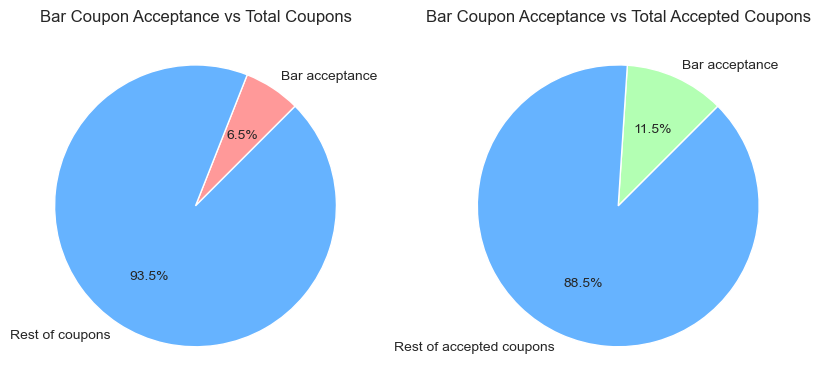

In [599]:
# Bar coupons acceptance in relation to total coupons
ans2_1 = bar_coupons[bar_coupons['Y'] == 1]['Y'].count()/len(coupon_df['Y'])

# Bar coupons acceptance in relation to all accepted coupons
ans2_2 = bar_coupons[bar_coupons['Y'] == 1]['Y'].count()/len(coupon_df[coupon_df['Y'] == 1]['Y'])

# Plot 2_1

labels = ['Bar acceptance', 'Rest of coupons']
sizes = [ans2_1, 1-ans2_1]
colors = ['#ff9999','#66b3ff']
fig, ax1 = plt.subplots(1,2, figsize=(10,5))
ax1[0].pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=45)
ax1[0].set_title('Bar Coupon Acceptance vs Total Coupons')

# Plot 2_2

labels = ['Bar acceptance', 'Rest of accepted coupons']
sizes = [ans2_2, 1-ans2_2]
colors = ['#b3ffb3','#66b3ff']
ax1[1].pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=45)
ax1[1].set_title('Bar Coupon Acceptance vs Total Accepted Coupons')

# save plot image
plt.savefig('images/plot2_1.png', dpi=300)

# show the plot
plt.show()

*<font color='purple'>These methods will be useful for the upcoming analysis. Will generate consistent plots useful to the analysis<font>*

In [600]:
def generate_pie_bar_duo(sizes, labels, pie_title, bar_title, filename=None, colors = [['#6693ff', '#66b3ff'], ['#b3b3DD', '#b3f3DD']]):
    # Create pie chart
    fig1, ax1 = plt.subplots(1, 2, figsize=(10, 5))
    ax1[0].pie(sizes, colors = colors[0], labels=labels,  autopct='%1.1f%%', startangle=90)
    ax1[0].axis('equal')
    ax1[0].set_title(pie_title)

    # Create bar plot
    ax1[1].bar(labels, sizes, color=colors[1])
    ax1[1].set_xlabel('')
    ax1[1].set_ylabel('Acceptance Count')
    ax1[1].set_title(bar_title)

    ax1[1].grid(False)
    ax1[1].spines[['right','top','left','bottom']].set_color('none')

    # Add text to the bar plot
    for i, v in enumerate(sizes):
        ax1[1].text(i, v/2, v, ha='center')

    plt.tight_layout()

    if filename is not None:
        # save plot image
        plt.savefig('images/' + filename, dpi=300)

    plt.show()

In [601]:
def generate_boxplot(size, ylabel, title, filename=None, labels=['Accepted Coupons', 'Rejected Coupons']):
    # create a boxplot
    fig, ax = plt.subplots(figsize=(4, 8))
    bp = ax.boxplot(size, vert=True,
                    labels=labels, widths=0.6, patch_artist=True,
                    medianprops={'linewidth': 2}, boxprops={'linewidth': 1})

    # set plot title and labels
    ax.set_title(title)
    ax.set_xlabel('')
    ax.set_ylabel(ylabel)

    # set axis tick labels font size
    ax.tick_params(axis='both', which='major', labelsize=10)

    # adjust subplot spacing
    fig.subplots_adjust(left=0.12, right=0.95, bottom=0.15)
    ax.spines[['right', 'top', 'left', 'bottom']].set_color('none')

    if filename is not None:
        # save plot image
        plt.savefig('images/' + filename, dpi=300)

    # show the plot
    plt.show()

In [602]:
def generate_countplot(x, data, hue, ylabel, title, xticklabels, legend_title, filename=None):
    # create the countplot
    ax = sns.countplot(x=x, data=data, hue=hue, edgecolor='black', linewidth=0.5)

    # set the title and labels
    plt.title(title)
    plt.xlabel('')
    plt.ylabel(ylabel)

    if xticklabels is not None:
        ax.set_xticklabels(xticklabels)

    ax.spines[:].set_visible(False)

    # move the legend to the right
    ax.legend(title=legend_title, loc='center right', bbox_to_anchor=(0.5, 0.5))

    if filename is not None:
        # save plot image
        plt.savefig('images/' + filename, dpi=300)

    # show the plot
    plt.show()

### 3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.

**<font color='orange'>Warning: </font>** *It's important to notice I'll be using the 'bar_coupons' dataset. Percentages will be relative to the bar accepted coupons total.*

*<font color='gray'>calculating bar-related coupon totals</font>*

In [603]:
total_bar_coupons = len(bar_coupons['Bar'].dropna())
total_accepted_bar_coupons = bar_coupons.query('Y == 1')['Bar'].dropna().count()

**3.1 calculate low/high frequency bar attenders**

*Terms definition:*

- *Low frequency Audience: <font color='gray'>those who went to a bar 3 or fewer times a month</font>*
- *High frequency Audience: <font color='gray'>those who went to a bar 3 or more times a month</font>*

In [604]:
# reminding myself of the mappings
rates

{'never': 0, 'less1': 1, '1~3': 2, '4~8': 6, 'gt8': 9}

In [605]:
# Low frequency Audience
d_ans3_1 = bar_coupons.query('Y == 1 & Bar <= 2')['Bar'].dropna().count()
ans3_1 = d_ans3_1/total_accepted_bar_coupons*100

# High frequency Audience
d_ans3_2 = bar_coupons.query('Y == 1 & Bar > 2')['Bar'].dropna().count()
ans3_2 = d_ans3_2/total_accepted_bar_coupons*100

**3.2 plot low/high frequency bar attenders coupon acceptance**

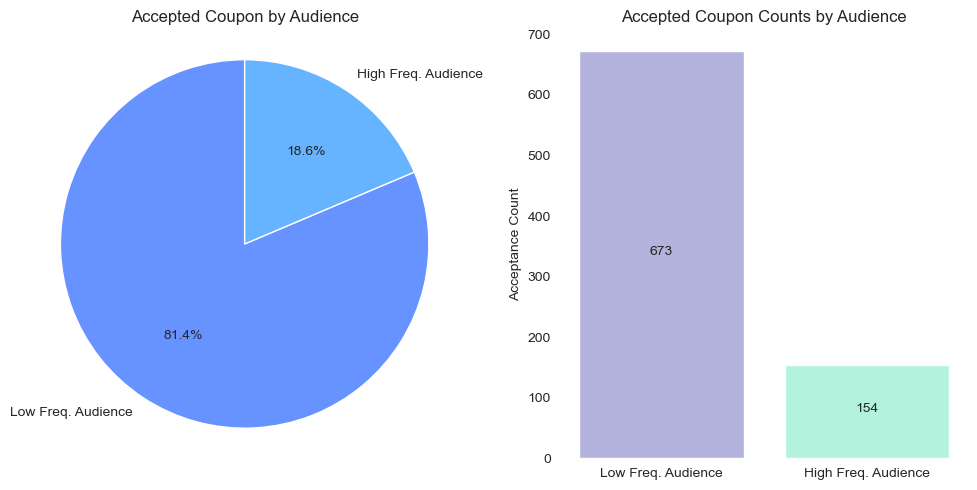

In [606]:
generate_pie_bar_duo([d_ans3_1, d_ans3_2],
                     ['Low Freq. Audience', 'High Freq. Audience'],
                     pie_title='Accepted Coupon by Audience',
                     bar_title='Accepted Coupon Counts by Audience',
                     filename='plot3_1.png')

### 4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?

**<font color='orange'>Warning: </font>** *It's important to notice I'll be using the 'bar_coupons' dataset. Percentages will be relative to the bar accepted coupons total.*

**4.1 calculate acceptance ratio for 25+ yo who go to bars more than once a month**

In [607]:
cond4 = 'Y == 1 & age > 25 & Bar > 1'
d_ans4_1 = bar_coupons.query(cond4)['Bar'].dropna().count()
ans4_1 = d_ans4_1/total_accepted_bar_coupons*100

**4.3 calculate acceptance ratio everyone else**

In [608]:
d_ans4_2 = total_accepted_bar_coupons - d_ans4_1
ans4_2 = d_ans4_2/total_accepted_bar_coupons*100

**4.4 plot results**

Terms definition:

- *Target Audience: <font color='gray'>25+ yo who go to bars more than once a month</font>*
- *Rest of population: <font color='gray'>the rest of population who accepted a bar coupon</font>*

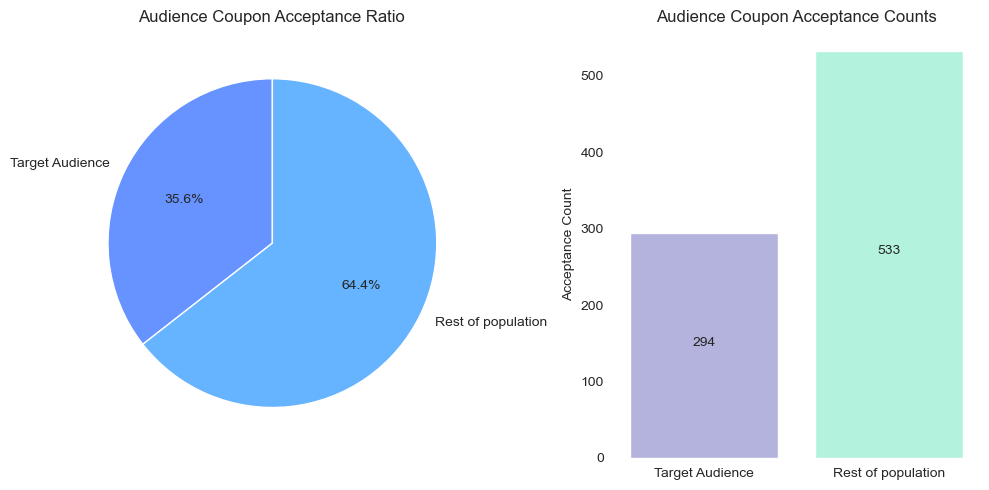

In [609]:
generate_pie_bar_duo([d_ans4_1, d_ans4_2],
                     ['Target Audience', 'Rest of population'],
                     pie_title='Audience Coupon Acceptance Ratio',
                     bar_title='Audience Coupon Acceptance Counts'
                     )

### 5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.

**<font color='orange'>Warning: </font>** *It's important to notice I'll be using the 'bar_coupons' dataset. Percentages will be relative to the bar accepted coupons total.*

**5.1 calculate acceptance ratio for this new condition**

In [610]:
# reminding myself of the mappings
passenger_mapping

{'passenger': {'Alone': 1, 'Partner': 2, 'Kid(s)': 3, 'Friend(s)': 4}}

In [611]:
cond5 = 'Y == 1 & Bar > 1 & passenger != 3 & occupation != "Farming Fishing & Forestry"'
d_ans5_1 = bar_coupons.query(cond5)['Bar'].dropna().count()
ans5_1 = d_ans5_1/total_accepted_bar_coupons*100

**5.2 calculate acceptance ratio for everyone else**

In [612]:
d_ans5_2 = total_accepted_bar_coupons - d_ans5_1
ans5_2 =  d_ans5_2/total_accepted_bar_coupons*100

**5.3 plot results**

**Terms definition:**

- *Target Audience: <font color='gray'>drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry</font>*
- *Rest of population: <font color='gray'>the rest of population who accepted a bar coupon</font>*

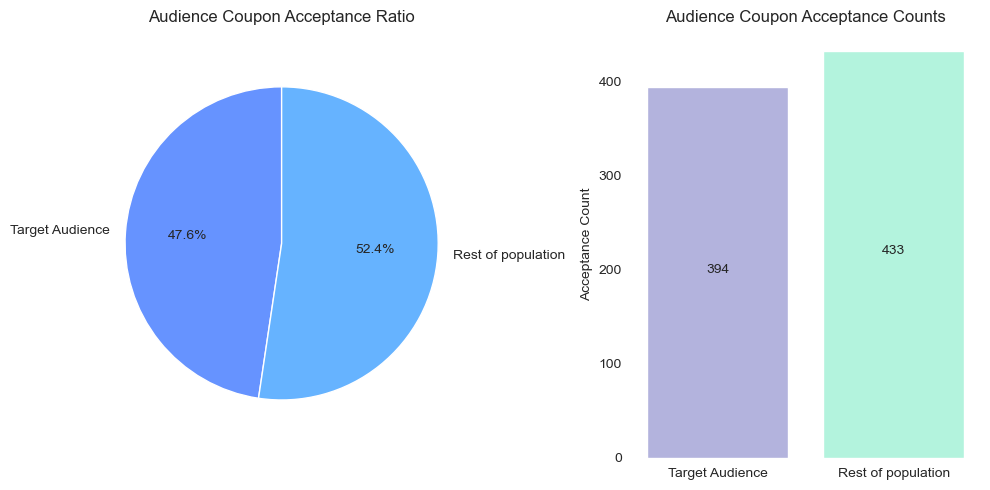

In [613]:
generate_pie_bar_duo([d_ans5_1, d_ans5_2],
                     ['Target Audience', 'Rest of population'],
                     pie_title='Audience Coupon Acceptance Ratio',
                     bar_title='Audience Coupon Acceptance Counts')

### 6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



**<font color='orange'>Warning: </font>** *It's important to notice I'll be using the 'bar_coupons' dataset. Percentages will be relative to the bar accepted coupons total.*

**6.1 calculate acceptance ratio for all three additional conditions**

In [614]:
# reminding myself of the mappings
rates

{'never': 0, 'less1': 1, '1~3': 2, '4~8': 6, 'gt8': 9}

In [615]:
# reminding myself of the mappings
maritalStatus_mapping

{'maritalStatus': {'Single': 1,
  'Married partner': 2,
  'Unmarried partner': 2,
  'Divorced': 1,
  'Widowed': 1}}

In [616]:
cond6_1 = 'Y == 1 & Bar > 1 & passenger != 3 & maritalStatus != 1'
d_ans6_1 = bar_coupons.query(cond6_1)['Bar'].dropna().count()
ans6_1 = d_ans6_1/total_accepted_bar_coupons*100

cond6_2 = 'Y == 1 & Bar > 1 & age < 30'
d_ans6_2 = bar_coupons.query(cond6_2)['Bar'].dropna().count()
ans6_2 = d_ans6_2/total_accepted_bar_coupons*100

cond6_3 = 'Y == 1 & RestaurantLessThan20 > 3 & income < 50_000'
d_ans6_3 = bar_coupons.query(cond6_3)['Bar'].dropna().count()
ans6_3 = d_ans6_3/total_accepted_bar_coupons*100


**6.2 plot results**

**Terms definition:**

*Audience 1: <font color='gray'>go to bars more than once a month, had passengers that were not a kid, and were not widowed</font>*
*Audience 2: <font color='gray'>go to bars more than once a month and are under the age of 30</font>*
*Audience 3: <font color='gray'>go to cheap restaurants more than 4 times a month and income is less than 50K</font>*


**Audience 1 plot**

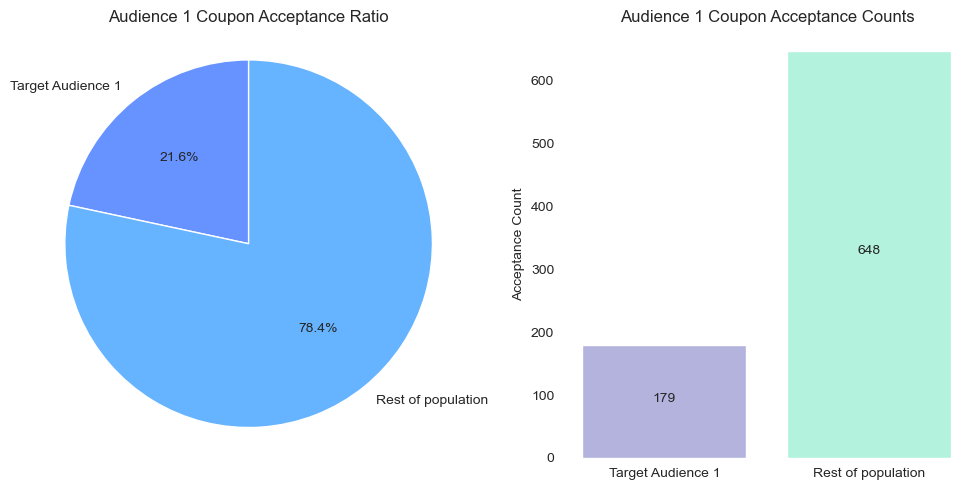

In [617]:
generate_pie_bar_duo([d_ans6_1, (total_accepted_bar_coupons - d_ans6_1)],
                     ['Target Audience 1', 'Rest of population'],
                     pie_title='Audience 1 Coupon Acceptance Ratio',
                     bar_title='Audience 1 Coupon Acceptance Counts')


**Audience 2 plot**

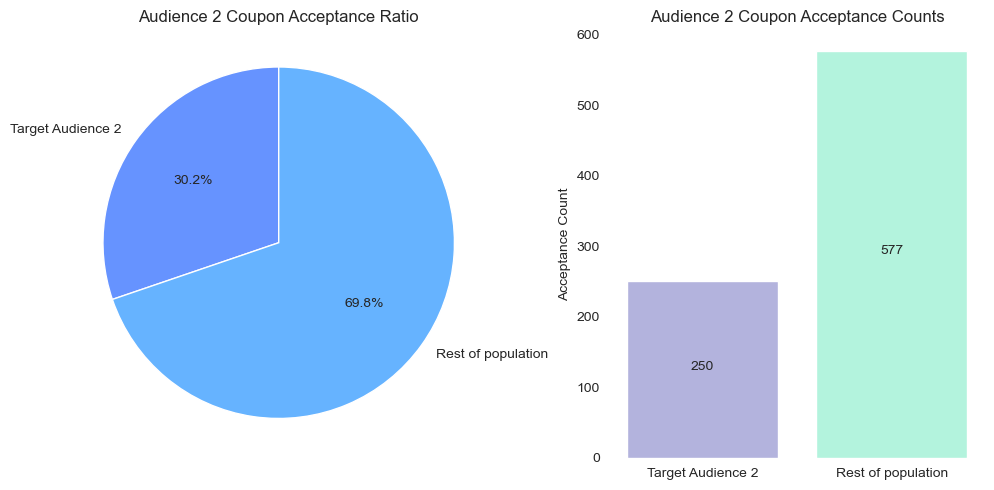

In [618]:
generate_pie_bar_duo([d_ans6_2, (total_accepted_bar_coupons - d_ans6_2)],
                     ['Target Audience 2', 'Rest of population'],
                     pie_title='Audience 2 Coupon Acceptance Ratio',
                     bar_title='Audience 2 Coupon Acceptance Counts')

**Audience 3 plot**

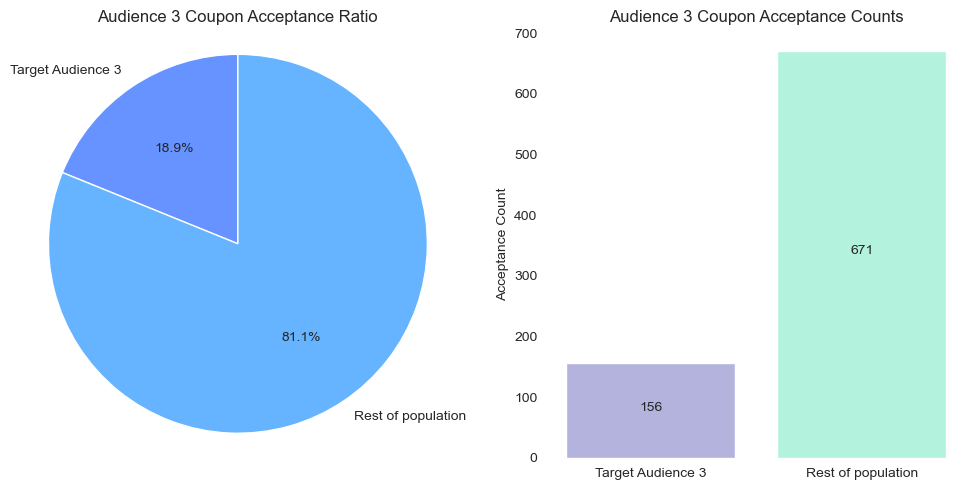

In [619]:
generate_pie_bar_duo([d_ans6_3, (total_accepted_bar_coupons - d_ans6_3)],
                     ['Target Audience 3', 'Rest of population'],
                     pie_title='Audience 3 Coupon Acceptance Ratio',
                     bar_title='Audience 3 Coupon Acceptance Counts')

### 7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

*First, I will compare all the audiences results we have explored so far*

**Terms definition:**

- *Audience 1: <font color='gray'>those who went to a bar 3 or fewer times a month</font>*
- *Audience 2: <font color='gray'>25+ yo who go to bars more than once a month</font>*
- *Audience 3: <font color='gray'>drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry</font>*
- *Audience 4: <font color='gray'>go to bars more than once a month, had passengers that were not a kid, and were not widowed</font>*
- *Audience 5: <font color='gray'>go to bars more than once a month and are under the age of 30</font>*
- *Audience 6: <font color='gray'>go to cheap restaurants more than 4 times a month and income is less than 50K</font>*

**7.1 Audiences performance plot**

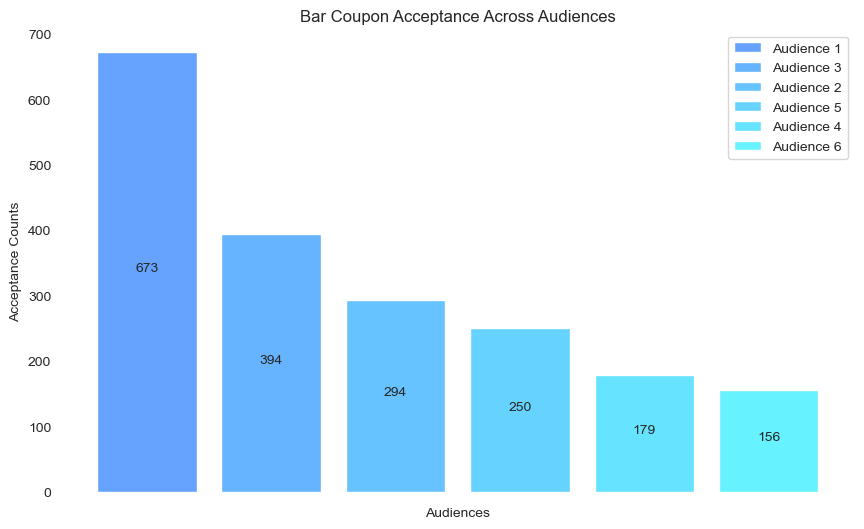

In [620]:
# Creating plot

bar_coupons_audiences_values={'Audience 1' : d_ans3_1,
                              'Audience 2' : d_ans4_1,
                              'Audience 3' : d_ans5_1,
                              'Audience 4' : d_ans6_1,
                              'Audience 5' : d_ans6_2,
                              'Audience 6' : d_ans6_3}

bar_coupons_audiences_values = dict(sorted(bar_coupons_audiences_values.items(), key=lambda item: item[1], reverse=True))

colors = ['#66a3ff','#66b3ff','#66c3ff','#66d3ff','#66e3ff','#66f3ff']

fig, ax = plt.subplots(facecolor='white')
ax.bar(bar_coupons_audiences_values.keys(), bar_coupons_audiences_values.values(), color=colors)

# Adding labels and title
plt.xlabel('Audiences')

plt.ylabel('Acceptance Counts')
plt.title('Bar Coupon Acceptance Across Audiences')

# Add text to the bar plot
for i, v in enumerate(bar_coupons_audiences_values.values()):
    ax.text(i, v/2, v, ha='center')

# Add legend
legend_elements = [Patch(facecolor=color, label=audience) for audience, color in zip(bar_coupons_audiences_values.keys(), colors)]

ax.legend(handles=legend_elements, loc='upper right')
ax.set_xticklabels([])

ax.grid(False)
ax.spines[['right','top','left','bottom']].set_color('none')

fig.set_size_inches(10.24, 6)

# save plot as image
plt.savefig('images/plot7_1.png', dpi=300)
plt.show()


*Audience 1 clearly outperforms the other audiences. Let's find out how bar attendance behaviour impacts bar coupon acceptance*

**7.2 Bar coupon acceptance based on driver behaviour**

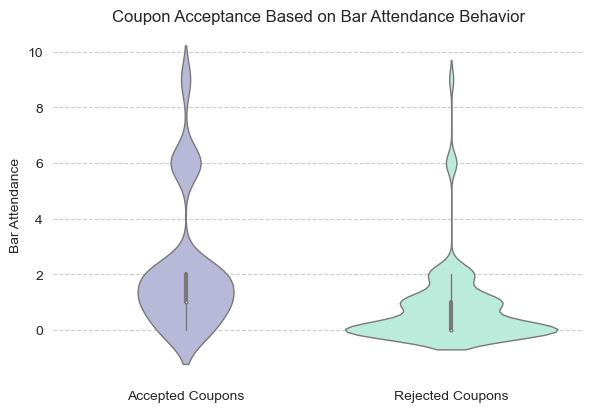

In [621]:
# create subsets based on coupon acceptance
bar_accepted_coupons = coupon_df.query('Y == 1 & coupon == "Bar"')['Bar'].dropna()
bar_rejected_coupons = coupon_df.query('Y == 0 & coupon == "Bar"')['Bar'].dropna()

# create a violin plot
ax = sns.violinplot(data=[bar_accepted_coupons, bar_rejected_coupons], linewidth=1, palette=['#b3b3DD','#b3f3DD'])

# set x-axis tick labels
ax.set_xticklabels(['Accepted Coupons', 'Rejected Coupons'])

# set plot title and labels
plt.title('Coupon Acceptance Based on Bar Attendance Behavior')
plt.xlabel('')
plt.ylabel('Bar Attendance')

# set axis tick labels font size
ax.tick_params(axis='both', which='major')

# add horizontal gridlines
ax.grid(axis='y', linestyle='--')

# adjust subplot spacing
plt.subplots_adjust(left=0.12, right=0.95, bottom=0.15)

# remove spines
ax.spines[:].set_visible(False)

# save plot as image
plt.savefig('images/plot7_2.png', dpi=300)

# show the plot
plt.show()

### <font color='red'>Investigating the Bar Coupons<br>Conclusion</font>

**Those who went to a bar between 1~3 times a month** represent **81.3%** of all people that accepted a bar coupon. Targeting people with this particular behaviour will increase the performance of bar coupons.

### 8. Independent Investigation

*Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.*

**8.1 What proportion of Coffee coupons were accepted?**

**Creating coffee specific dataset and totals**

In [622]:
coffee_coupons = coupon_df.copy()
coffee_coupons = coffee_coupons.query('coupon == "Coffee House"')
total_accepted_coffee_coupons = coffee_coupons.query('Y == 1')['CoffeeHouse'].dropna().count()

**plotting coffee coupons acceptance ratio**

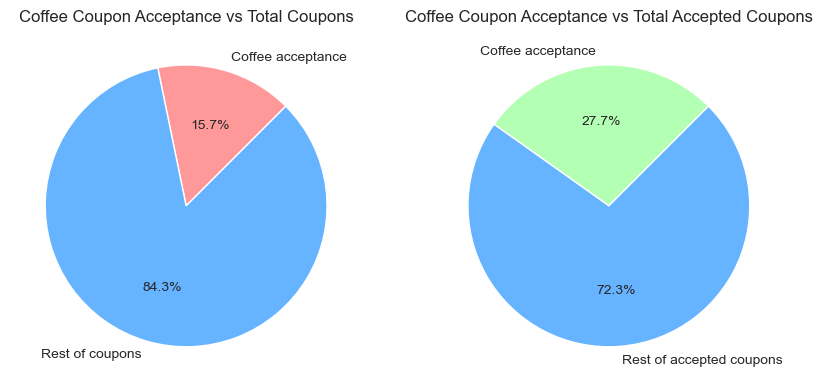

In [623]:
# Coffee coupons acceptance in relation to total coupons
ans8_1 = coffee_coupons[coffee_coupons['Y'] == 1]['Y'].count()/len(coupon_df['Y'])

# Coffee coupons acceptance in relation to all accepted coupons
ans8_2 = coffee_coupons[coffee_coupons['Y'] == 1]['Y'].count()/len(coupon_df[coupon_df['Y'] == 1]['Y'])

# Plot 8_1
labels = ['Coffee acceptance', 'Rest of coupons']
sizes = [ans8_1, 1-ans8_1]
colors = ['#ff9999','#66b3ff']
fig, ax1 = plt.subplots(1,2, figsize=(10,5))
ax1[0].pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=45)
ax1[0].set_title('Coffee Coupon Acceptance vs Total Coupons')

# Plot 8_2
labels = ['Coffee acceptance', 'Rest of accepted coupons']
sizes = [ans8_2, 1-ans8_2]
colors = ['#b3ffb3','#66b3ff']
ax1[1].pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=45)
ax1[1].set_title('Coffee Coupon Acceptance vs Total Accepted Coupons')

# save plot as image
plt.savefig('images/plot8_1.png', dpi=300)

plt.show()

**8.2 Analyzing Accepted Coffee Coupon behaviour**

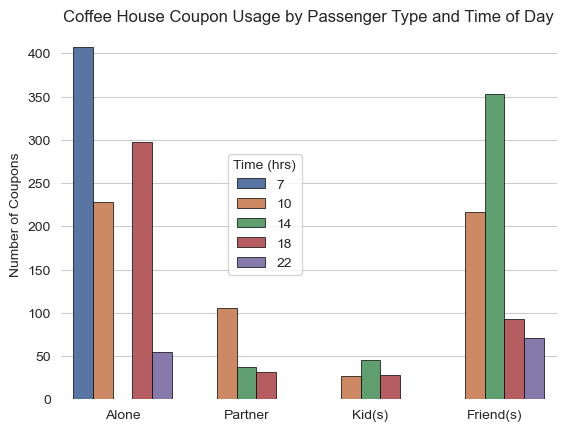

In [624]:
passenger_label_mapping = ['Alone','Partner','Kid(s)','Friend(s)']

generate_countplot(x='passenger',
                   data=coffee_coupons.query('Y == 1'),
                   ylabel='Number of Coupons',
                   title='Coffee House Coupon Usage by Passenger Type and Time of Day',
                   hue='time',
                   legend_title='Time (hrs)',
                   filename='plot8_2_1.png',
                   xticklabels = passenger_label_mapping)


**<font color='blue'>INSIGHT: </font>** *time of day attendance is affected by passenger type. Alone people skip lunchtime coffee while friends do it the most*

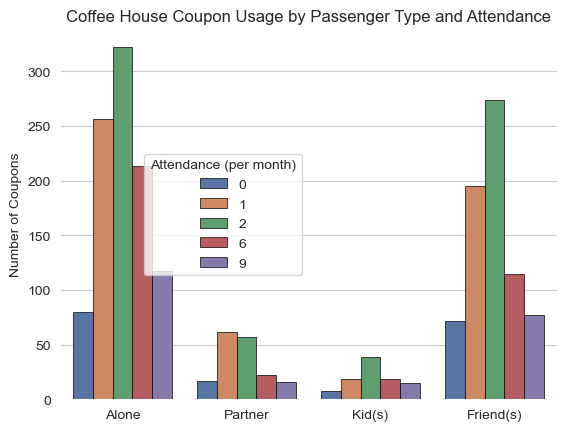

In [625]:
passenger_label_mapping = ['Alone','Partner','Kid(s)','Friend(s)']

generate_countplot(x='passenger',
                   data=coffee_coupons.query('Y == 1'),
                   ylabel='Number of Coupons',
                   title='Coffee House Coupon Usage by Passenger Type and Attendance',
                   hue='CoffeeHouse',
                   legend_title='Attendance (per month)',
                   filename='plot8_2_2.png',
                   xticklabels = passenger_label_mapping)

**<font color='blue'>INSIGHT: </font>** *behaviour is consistent among all 4 passenger profiles.
Scores of 1, 2, and 6 are in the top 3 performers across the board. A score of `2` is top 1 in 3 out of 4 profiles.*

**8.3 Identify acceptance criteria**

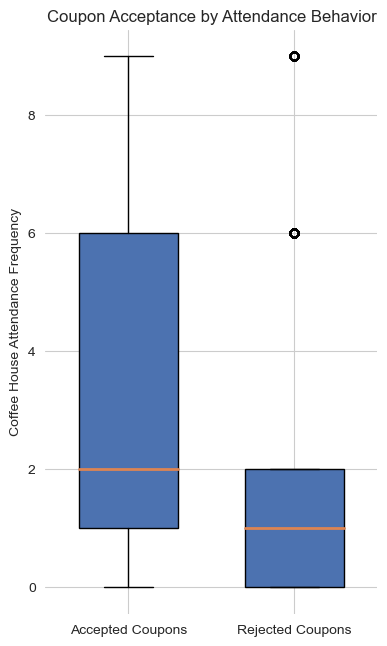

In [626]:
# create subsets of the dataset
coffee_accepted_coupons = coupon_df.query('Y == 1 & coupon == "Coffee House"')['CoffeeHouse'].dropna()
coffee_rejected_coupons = coupon_df.query('Y == 0 & coupon == "Coffee House"')['CoffeeHouse'].dropna()

generate_boxplot(size=[coffee_accepted_coupons, coffee_rejected_coupons],
                 title='Coupon Acceptance by Attendance Behavior',
                 ylabel='Coffee House Attendance Frequency',
                 filename='plot8_3.png')

In [627]:
# reminding myself of the mapping
rates

{'never': 0, 'less1': 1, '1~3': 2, '4~8': 6, 'gt8': 9}

**<font color='blue'>INSIGHT: </font>** *people that visit a coffee shop 1-8 per month (scores 2,6) are more likely to accept a coupon.*

**8.4 verifying the last insight**

**8.4.1 verifying rejection rates**

In [628]:
# accepted coffee coupons, scores 2,6
d_ans8_4_1 = coffee_coupons.query('Y == 1 & CoffeeHouse in (2,6)')['CoffeeHouse'].dropna().count()
ans8_4_1 = d_ans8_4_1/total_accepted_coffee_coupons*100

# rejected coffee coupons, scores 2,6
d_ans8_4_2 = coffee_coupons.query('Y == 0 & CoffeeHouse in (2,6)')['CoffeeHouse'].dropna().count()
ans8_4_2 = d_ans8_4_2/total_accepted_coffee_coupons*100

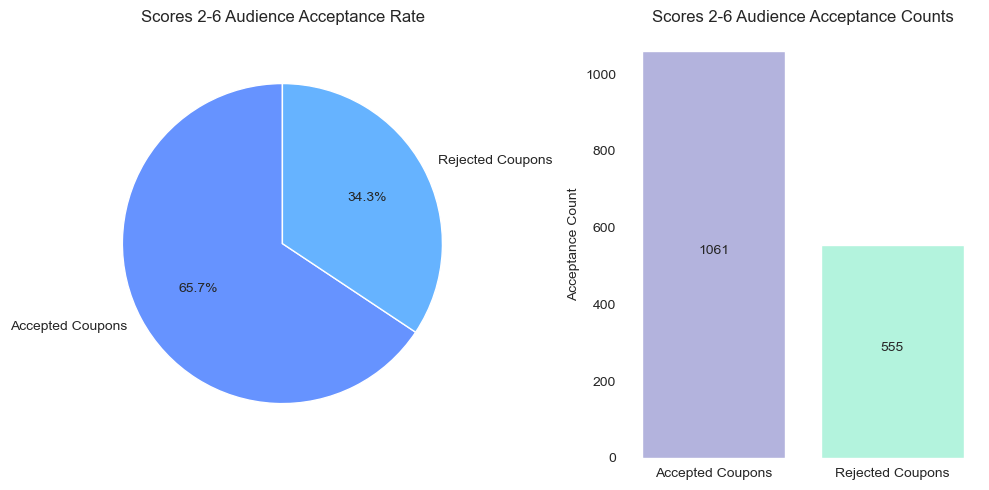

In [629]:
generate_pie_bar_duo([d_ans8_4_1, d_ans8_4_2], ['Accepted Coupons', 'Rejected Coupons'],
                     pie_title='Scores 2-6 Audience Acceptance Rate',
                     bar_title='Scores 2-6 Audience Acceptance Counts',
                     filename='plot8_4_1.png')

**8.4.2 verifying acceptance distribution**

In [630]:
# accepted coffee coupons, scores 2,6
d_ans8_4_2_1 = coffee_coupons.query('Y == 1 & CoffeeHouse in (2,6)')['CoffeeHouse'].dropna().count()
ans8_4_2_1 = d_ans8_4_2_1/total_accepted_coffee_coupons*100

# accepted coffee coupons, scores other than 2,6
d_ans8_4_2_2 = coffee_coupons.query('Y == 1 & CoffeeHouse not in (2,6)')['CoffeeHouse'].dropna().count()
ans8_4_2_2 = d_ans8_4_2_2/total_accepted_coffee_coupons*100

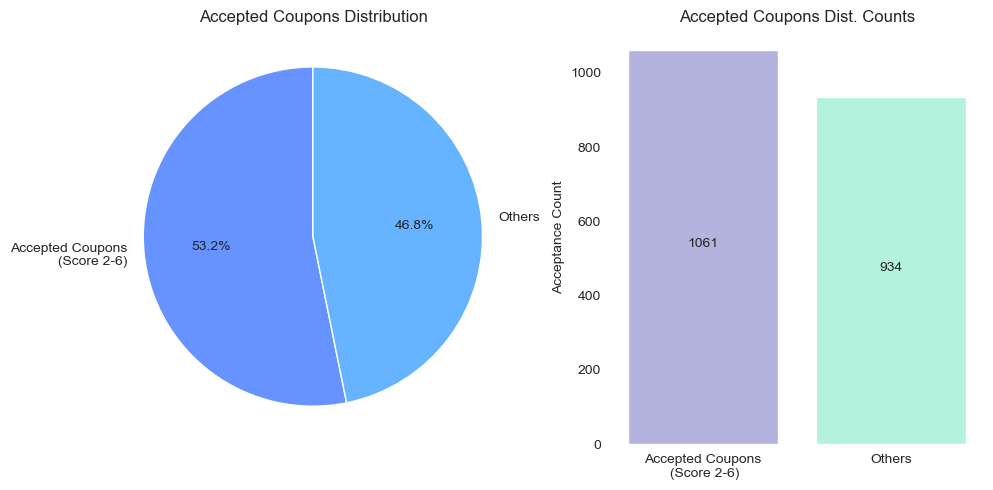

In [631]:
generate_pie_bar_duo([d_ans8_4_2_1, d_ans8_4_2_2], ['Accepted Coupons\n (Score 2-6)', 'Others'],
                     pie_title='Accepted Coupons Distribution',
                     bar_title='Accepted Coupons Dist. Counts',
                     filename='plot8_4_2.png')

### <font color='red'>Investigating Coffee Coupons<br>Conclusion</font>

**Scores of 2 and 6** have the higher chances of success. Makes sense to me to focus more effort into identifying these people and offering more coupons to them.